In [42]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

np.set_printoptions(precision = 3)

In [36]:
def plot_matrix(matrix_seq, xAx, labels):
    true_neg = list(mat[0][0] for mat in matrix_seq)
    false_neg = list(mat[1][0] for mat in matrix_seq)
    false_pos = list(mat[0][1] for mat in matrix_seq)
    true_pos = list(mat[1][1] for mat in matrix_seq)
    #xAx = list(range(len(matrix_seq)))
    plt.plot(xAx, true_neg, color = 'red', label = 'TN')
    plt.plot(xAx, false_neg, color = 'blue', label = 'FN')
    plt.plot(xAx, true_pos, color = 'green', label = 'TP')
    plt.plot(xAx, false_pos, color = 'black', label = 'FP')
    plt.legend(loc='best')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.grid(linewidth=1)
    plt.show()
    return 


def plot_scores(scores, param, labels):
    plt.plot(param, scores)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.grid(linewidth=1)
    plt.show()
    return

def plot_metrics(metrics, xAx, labels):
    marks = ['o','v','x','D']
    i = 0
    for key in metrics:
        plt.plot(xAx, metrics[key], label = key, marker = marks[i])
        i += 1
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.grid(linewidth = 1)
    plt.legend(loc='best')
    plt.show()
    return

def full_plot(mat, par, mat_lab):
        
#     plt.figure(figsize=(10,10))
#     plt.subplot(2,1,1)
#     plt.title("Confusion matrix")
#     plot_matrix(mat, par, mat_lab)
    
#     plt.figure(figsize = (10,10))
#     plt.subplot(2,1,1)
    
    plt.figure(figsize = (10,10))
    plt.subplot(2,1,1)
    plt.title("Positive metrics")
    metrics = get_metrics(mat, 'positive')
    best_scores = get_best_scores(metrics)
    best_scores['Parameter'] = par[best_scores['Parameter']]
    plot_metrics(metrics, par, mat_lab)
    
    print_scores(best_scores)
    
#     plt.figure(figsize = (10,10))
#     plt.subplot(2,1,2)
#     plt.title("Negative metrics")
#     metrics = get_metrics(mat, 'negative')
#     best_scores = get_best_scores(metrics)
#     best_scores['Parameter'] = par[best_scores['Parameter']]
#     plot_metrics(metrics, par, mat_lab)
    
#     print_scores(best_scores)
    return best_scores
    
def print_scores(scor):
    for key in scor:
        print(key, '\t\t-\t', "%.4f" % (scor[key]))
    return
    
def get_metrics(matrix_seq, cl):
    true_neg = np.asarray(list(mat[0][0] for mat in matrix_seq))
    false_neg = np.asarray(list(mat[1][0] for mat in matrix_seq))
    false_pos = np.asarray(list(mat[0][1] for mat in matrix_seq))
    true_pos = np.asarray(list(mat[1][1] for mat in matrix_seq))
    
    if cl == 'positive':
        accuracy = 100*(true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg)
        precision = 100*true_pos/np.add(true_pos, false_pos)
        recall = 100*true_pos/(true_pos + false_neg)
        FM = ((true_pos/(true_pos + false_pos))*(true_pos/(true_pos+false_neg)))**(1/2)
        F1score = 2*precision*recall/(precision+recall)
    elif cl == 'negative':
        accuracy = (true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg)
        precision = true_neg/np.add(true_neg, false_neg)
        recall = true_neg/(true_neg + false_pos)
        FM = ((true_pos/(true_pos + false_pos))*(true_pos/(true_pos+false_neg)))**(1/2)
        F1score = 2*precision*recall/(precision+recall)
        
    metr = dict()
    metr['Recall'] = recall
    metr['Precision'] = precision
    metr['F1 score'] = F1score
#     metr['Folwkes-Mallows'] = FM
    metr['Accuracy'] = accuracy
    return metr

def get_best_scores(metr):
    best_sc = dict()
    max_ind = np.argmax(metr['F1 score'])
    for key in metr:
        best_sc[key] = metr[key][max_ind]
    best_sc["Parameter"] = max_ind
    return best_sc

In [16]:
df = pd.read_csv('peak_data_mining.csv')

In [17]:
df.head()

,name,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Target
0,marina1_0_Con,-4.967338e-13,0.015955,0.088209,0.228236,0.310381,0.150325,-0.191066,-0.441515,-0.422158,-0.111689,0.377975,0.818441,1.000000,0.884499,0.594843,0
1,marina1_1_Con,1.595489e-02,0.088209,0.228236,0.310381,0.150325,-0.191066,-0.441515,-0.422158,-0.111689,0.377975,0.818441,1.000000,0.884499,0.594843,0.300374,0
2,marina1_2_Con,8.820920e-02,0.228236,0.310381,0.150325,-0.191066,-0.441515,-0.422158,-0.111689,0.377975,0.818441,1.000000,0.884499,0.594843,0.300374,0.101979,1
3,marina1_3_Con,2.282362e-01,0.310381,0.150325,-0.191066,-0.441515,-0.422158,-0.111689,0.377975,0.818441,1.000000,0.884499,0.594843,0.300374,0.101979,-0.002891,1
4,marina1_4_Con,3.103807e-01,0.150325,-0.191066,-0.441515,-0.422158,-0.111689,0.377975,0.818441,1.000000,0.884499,0.594843,0.300374,0.101979,-0.002891,0.001980,0


In [31]:
keys = df.columns.values
keys = keys[1:-1]
print(keys)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14']


In [34]:
nulls = df[df['Target']==0].count()
nulls = nulls['name']
ones = df[df['Target']==1].count()
ones = ones['name']

lenDiff = abs(nulls-ones)
halfLength = int(ones/2)
print(halfLength)

df_null = df[df['Target']==0].iloc[lenDiff:]
df_ed = df[df['Target']==1]
df_train = pd.concat([df_null.head(halfLength), df_ed.head(halfLength)], ignore_index = True)
df_ver = pd.concat([df_null.tail(halfLength), df_ed.tail(halfLength)], ignore_index = True)

df_train.sample(frac=1).reset_index(drop=True)
df_ver.sample(frac=1).reset_index(drop=True)

6023


,name,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Target
0,semchuk5_prised_886_Con,-3.212208e+00,-3.931943,-4.760975,-5.750687,-6.941350,-8.653246,-10.489502,-10.989619,-9.515145,-7.117952,-5.012392,-3.429669,-1.975686,-0.361715,1.000000,0
1,semchuk3_988_Con,-2.649437e+00,-1.304922,0.192024,0.699593,0.222752,-0.358784,-0.340596,0.349633,1.000000,0.580944,-1.029398,-2.810864,-3.430349,-2.082318,0.764582,1
2,tarasov1_426_Con,1.000000e+00,0.936495,0.766474,0.483863,0.208825,0.050957,-0.015201,-0.075238,-0.191019,-0.355762,-0.514150,-0.646664,-0.769663,-0.892085,-1.019358,1
3,Stolyarov_2_213_Vid,1.555237e-01,0.402018,0.694673,0.927968,1.000000,0.872863,0.574846,0.182573,-0.205911,-0.519813,-0.743968,-0.886856,-0.950235,-0.931841,-0.830521,1
4,semcha_3_421_Con,6.469222e-01,-0.457271,-1.557185,-3.213059,-6.372335,-9.714671,-10.231461,-7.238693,-2.936210,0.152731,1.000000,0.234623,-1.321139,-3.432961,-4.876687,1
5,semchuk5_prised_307_Vid,-4.556234e-01,-0.077380,0.404238,0.805179,1.000000,0.953433,0.709480,0.364956,0.011679,-0.286764,-0.478712,-0.525437,-0.441285,-0.308295,-0.228752,0
6,tarasov1_155_Con,-5.340372e+00,-5.613915,-6.410757,-8.360109,-11.201520,-13.384922,-13.064001,-9.948197,-5.436008,-1.387693,0.877171,1.000000,-0.486552,-2.272554,-3.017748,1
7,Eremin_2_991_Vid,6.662207e-01,0.953492,1.000000,0.816979,0.493453,0.137551,-0.169564,-0.406632,-0.588649,-0.723165,-0.809626,-0.850330,-0.843948,-0.767005,-0.631068,0
8,semchuk5_prised_247_Con,2.716086e-01,0.772166,1.000000,0.891844,0.600046,0.331590,0.227366,0.329172,0.544993,0.707440,0.676915,0.393421,-0.050383,-0.454259,-0.657224,0
9,Berestenkova_2_203_Vid,-5.991405e-01,-1.270961,-1.512585,-1.357917,-1.066734,-0.861503,-0.934312,-1.437086,-2.189609,-2.721412,-2.777583,-2.377842,-1.520910,-0.301890,1.000000,1


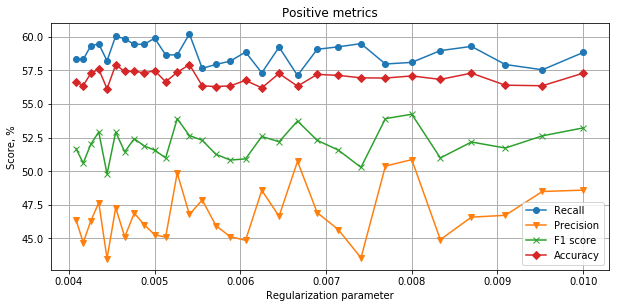

Recall 		-	 58.0994
Precision 		-	 50.8551
F1 score 		-	 54.2364
Accuracy 		-	 57.0895
Parameter 		-	 0.0080


In [45]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 5), activation = 'logistic')
    

scores = []
alphas = []
conf_mat = []
for i in range(200, 500, 10):
    a = 2/i
    clf.alpha = a
    clf.fit(df_train[features].values, df_train['Target'].values)
    scoreRes = clf.score(df_ver[features].values, df_ver['Target'].values)
    res_pred = clf.predict(df_ver[features].values)
    scores.append(scoreRes)
    conf_mat.append(confusion_matrix(res_pred, df_ver['Target'].values)/halfLength)
    alphas.append(a)
full_plot(conf_mat, alphas, ["Regularization parameter", 'Score, %'])
plt.show()